# Car price prediction model - UCI ML Data set

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is DE45-1ABD

 Directory of E:\Data science\Python bootcamp\Refactored_Py_DS_ML_Bootcamp-master\General practise\Car price prediction

02-Jul-Sat  11:24    <DIR>          .
02-Jul-Sat  11:24    <DIR>          ..
02-Jul-Sat  11:19    <DIR>          .ipynb_checkpoints
02-Jul-Sat  11:24               843 Car price_prediction.ipynb
02-Jul-Sat  11:18            35,556 car_data.xlsx
02-Jul-Sat  08:17            25,936 imports-85.data
02-Jul-Sat  08:17             4,747 imports-85.names
               4 File(s)         67,082 bytes
               3 Dir(s)  141,547,425,792 bytes free


In [11]:
car = pd.read_excel('car_data.xlsx')

In [12]:
car.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [14]:
car.select_dtypes(include='object').columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [16]:
#car['normalized-losses'].value_counts()

In [18]:
#car['make'].value_counts()

In [20]:
#car['fuel-type'].value_counts()

In [22]:
#car['aspiration'].value_counts()

In [24]:
#car['num-of-doors'].value_counts()

In [26]:
#car['body-style'].value_counts()

In [28]:
#car['drive-wheels'].value_counts()

In [62]:
#car['engine-location'].value_counts()

In [89]:
#car['engine-type'].value_counts()

In [91]:
#car['num-of-cylinders'].value_counts()

In [70]:
#car['fuel-system'].value_counts()

In [72]:
#car['bore'].value_counts()

In [74]:
#car['stroke'].value_counts()

In [76]:
#car['horsepower'].value_counts()

In [85]:
#car['peak-rpm'].value_counts()

In [83]:
#car['price'].value_counts()

In [81]:
car.replace('?', np.NaN, inplace=True)

In [86]:
car.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [87]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [95]:
car.isnull().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
engine-type           0
highway-mpg           0
city-mpg              0
compression-ratio     0
fuel-system           0
engine-size           0
num-of-cylinders      0
symboling             0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
curb-weight           0
dtype: int64

In [101]:
car[car['price'].isnull()].transpose()

,9,44,45,129
symboling,0,1,0,1
normalized-losses,NaN,NaN,NaN,NaN
make,audi,isuzu,isuzu,porsche
fuel-type,gas,gas,gas,gas
aspiration,turbo,std,std,std
num-of-doors,two,two,four,two
body-style,hatchback,sedan,sedan,hatchback
drive-wheels,4wd,fwd,fwd,rwd
engine-location,front,front,front,front
wheel-base,99.5,94.5,94.5,98.4


<AxesSubplot:>

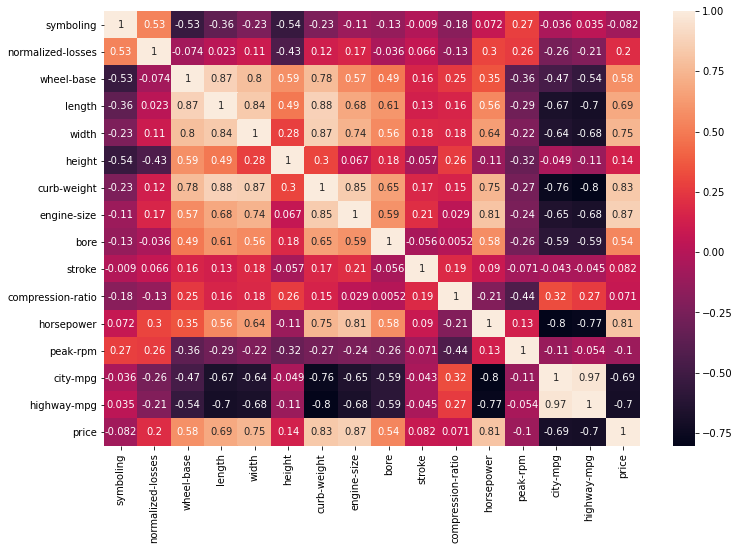

In [104]:
plt.figure(figsize=(12,8))
sns.heatmap(car.corr(), annot=True)

<AxesSubplot:xlabel='make', ylabel='normalized-losses'>

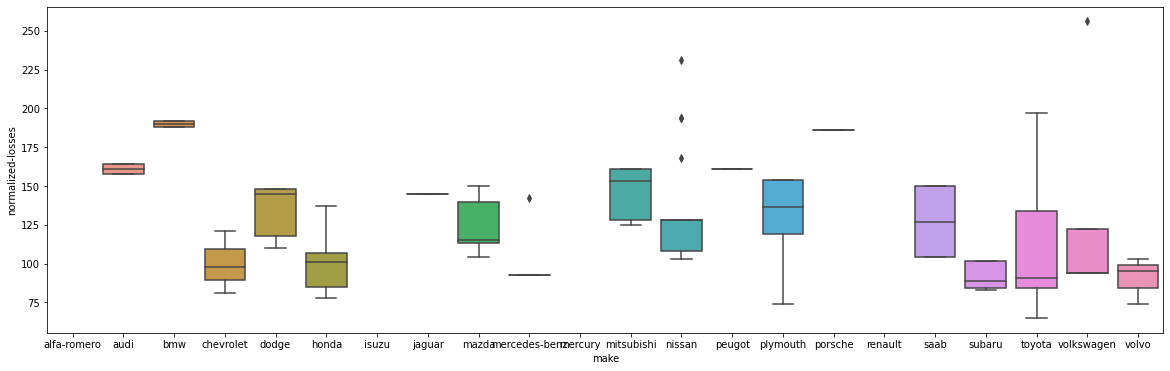

In [108]:
plt.figure(figsize=(20,6))
sns.boxplot(x='make', y='normalized-losses', data=car)

<AxesSubplot:xlabel='make', ylabel='count'>

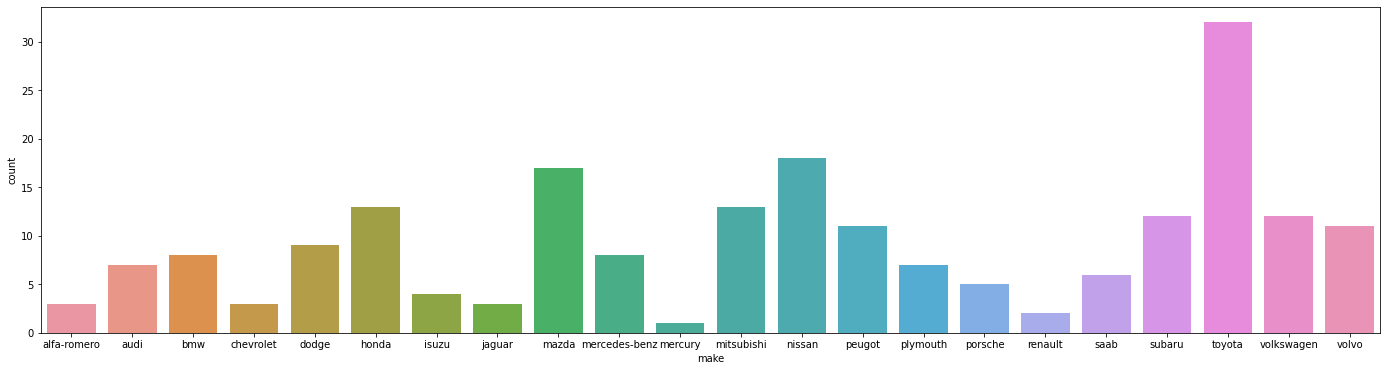

In [112]:
plt.figure(figsize=(24,6))
sns.countplot(x='make',data=car)

In [113]:
car[car['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [ ]:
sns.countplot(x='make', data = car[car['normalized-losses'].isnull()])

In [120]:
Sym_nloss_fill = car.groupby(by=['symboling']).mean()['normalized-losses']
print(Sym_nloss_fill)

symboling
-2    103.000000
-1     85.600000
 0    113.166667
 1    128.574468
 2    125.689655
 3    168.647059
Name: normalized-losses, dtype: float64


In [122]:
Sym_nloss_fill[0]

113.16666666666667

In [117]:
car.groupby(by=['make','symboling']).mean()['normalized-losses']

make           symboling
alfa-romero     1                  NaN
                3                  NaN
audi            0                  NaN
                1           158.000000
                2           164.000000
bmw             0           189.333333
                1                  NaN
                2           192.000000
chevrolet       0            81.000000
                1            98.000000
                2           121.000000
dodge          -1           110.000000
                1           135.142857
                3           145.000000
honda           0            93.571429
                1           102.500000
                2           137.000000
isuzu           0                  NaN
                1                  NaN
                2                  NaN
jaguar          0           145.000000
mazda           0           115.750000
                1           113.714286
                3           150.000000
mercedes-benz  -1            93.000000


In [119]:
car1 = car.copy(deep=True)

In [127]:
car1['normalized-losses'].isnull().sum()

41

In [128]:
def Symb_normloss_fill(sym,normlo):
    if np.isnan(normlo):
        return Sym_nloss_fill[sym]
    else:
        return normlo

In [129]:
car1['normalized-losses'] = car1.apply(lambda X: Symb_normloss_fill(X['symboling'],X['normalized-losses']), axis=1)

In [133]:
car1.isnull().sum().sort_values(ascending=False)

price                4
stroke               4
bore                 4
peak-rpm             2
num-of-doors         2
horsepower           2
engine-type          0
highway-mpg          0
city-mpg             0
compression-ratio    0
fuel-system          0
engine-size          0
num-of-cylinders     0
symboling            0
normalized-losses    0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
aspiration           0
fuel-type            0
make                 0
curb-weight          0
dtype: int64

In [136]:
car1['stroke'].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15,  nan, 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64,
       3.08, 3.5 , 3.54, 2.87])

<AxesSubplot:xlabel='count', ylabel='stroke'>

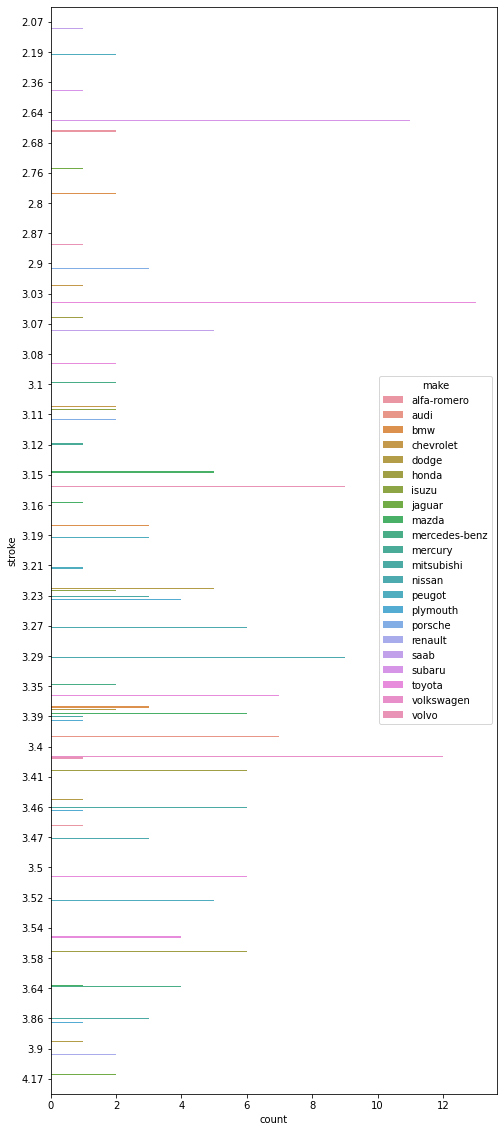

In [139]:
plt.figure(figsize=(8,20))
sns.countplot(y='stroke',data=car1, hue='make')

In [141]:
car1['bore'].unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08,  nan, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7 , 3.61, 3.94,
       3.74, 2.54, 3.05, 3.27, 3.24, 3.01])

In [142]:
car1['horsepower'].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        nan,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.])

In [143]:
car1.dropna(inplace=True)

In [144]:
car1.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [146]:
len(car1)

193

In [147]:
car1.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [148]:
catre = car1.copy(deep=True)

In [150]:
car1['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [152]:
car1['num-of-doors'] = car1['num-of-doors'].map({'two':2,'four':4})

In [153]:
car1['num-of-doors'].unique()

array([2, 4], dtype=int64)

In [154]:
car1['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [155]:
car1['num-of-cylinders'] = car1['num-of-cylinders'].map({'four':4,'six':6, 'five':5, 'three':3, 'twelve':12, 'eight':8})

In [156]:
car1['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  8], dtype=int64)

In [157]:
car1['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [158]:
car1['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [159]:
car1['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [160]:
car1['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [161]:
car1['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [162]:
car1['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'ohcf'], dtype=object)

In [163]:
car1['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi'], dtype=object)

In [167]:
car1.select_dtypes(include='object').columns.to_list()

['make',
 'fuel-type',
 'aspiration',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'fuel-system']

In [169]:
car1 = pd.get_dummies(data=car1, columns=['make','fuel-type','aspiration','body-style','drive-wheels','engine-location',
                                   'engine-type','fuel-system'],drop_first=True)

In [170]:
car1.shape

(193, 57)

In [171]:
car1.head(3)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,168.647059,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,3,168.647059,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,1,128.574468,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,1,0,0,0,1,0,0


In [172]:
X = car1.drop(columns=['price'],axis=1)
y = car1['price']

In [173]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import Lasso

In [177]:
from numpy import mean, std, absolute

In [188]:
X_scaled = MinMaxScaler().fit_transform(X)

In [191]:
X_scaled.shape

(193, 56)

In [193]:
#X.columns

In [194]:
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns)

In [195]:
X_scaled_df.head(2)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.542655,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.542655,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [176]:
car1.corr()['price'].sort_values()

highway-mpg            -0.719178
city-mpg               -0.706618
drive-wheels_fwd       -0.603598
fuel-system_2bbl       -0.510875
engine-type_ohc        -0.339387
body-style_hatchback   -0.303808
make_toyota            -0.187832
make_honda             -0.169888
make_subaru            -0.151392
make_dodge             -0.141628
make_mitsubishi        -0.134744
make_plymouth          -0.127957
fuel-type_gas          -0.115440
make_nissan            -0.114059
make_chevrolet         -0.113351
make_mazda             -0.109561
peak-rpm               -0.103835
make_volkswagen        -0.102365
symboling              -0.084835
fuel-system_spdi       -0.062899
make_isuzu             -0.055407
body-style_wagon       -0.036659
fuel-system_spfi       -0.020010
fuel-system_mfi        -0.002872
engine-type_ohcf        0.016320
make_mercury            0.028785
engine-type_l           0.042846
make_saab               0.043033
num-of-doors            0.046460
make_peugot             0.067160
compressio

In [178]:
model = Lasso()

In [179]:
cv = KFold(n_splits=5)

In [244]:
search = GridSearchCV(estimator=model,param_grid={'alpha':np.arange(90,140)},scoring='neg_mean_absolute_error',n_jobs=-1, cv=cv, verbose=1)

In [181]:
results = search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220467705.21248868, tolerance: 1256318.6290870467
  model = cd_fast.enet_coordinate_descent(


In [182]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3667.090
Config: {'alpha': 0.1}


<AxesSubplot:xlabel='price', ylabel='Count'>

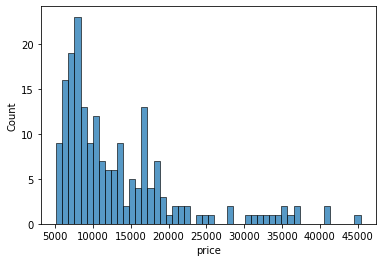

In [186]:
sns.histplot(car1['price'], bins=50)

In [187]:
car1['price'].mean()

13285.025906735751

In [245]:
results_sca = search.fit(X_scaled_df,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [246]:
print('MAE: %.3f' % abs(results_sca.best_score_))
print('Config: %s' % results_sca.best_params_)

MAE: 3085.274
Config: {'alpha': 113}


In [247]:
print('The % error is: {}'.format(abs(results_sca.best_score_)/car1['price'].mean()))

The % error is: 0.23223697114467232


In [248]:
lasso_fit = Lasso(alpha=113).fit(X_scaled_df,y)

In [249]:
lasso_fit.coef_

array([    0.        ,    -0.        ,    -0.        ,     0.        ,
           0.        ,  3347.84602474,     0.        ,  5419.7618169 ,
           0.        , 15163.56694597,     0.        ,    -0.        ,
           0.        ,  6217.28706188,     0.        ,    -0.        ,
          -0.        ,     0.        ,  4405.40413109,     0.        ,
          -0.        ,     0.        ,    -0.        ,     0.        ,
           0.        ,  5856.06236789,    -0.        ,    -0.        ,
        -305.07911877,    -0.        ,    -0.        ,  4435.11713445,
           0.        ,    -0.        , -1134.94050687,    -0.        ,
           0.        ,    -0.        ,     0.        ,     0.        ,
        -816.3941787 ,     0.        ,   -18.87449703,   -58.8111071 ,
        1576.35407781,  1060.38781172,    -0.        ,     0.        ,
           0.        ,    -0.        ,   -64.7434895 ,     0.        ,
          -0.        ,   941.92652674,    -0.        ,    -0.        ])

In [259]:
Lasso_coeff_df = pd.DataFrame(data=lasso_fit.coef_,index=X_scaled_df.columns, columns=['Lasso_coeff'])
Lasso_coeff_df

,Lasso_coeff
symboling,0.000000
normalized-losses,-0.000000
num-of-doors,-0.000000
wheel-base,0.000000
length,0.000000
width,3347.846025
height,0.000000
curb-weight,5419.761817
num-of-cylinders,0.000000
engine-size,15163.566946


In [261]:
len(Lasso_coeff_df[Lasso_coeff_df['Lasso_coeff']!=0])

16

In [264]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [263]:
r2_score(y,lasso_fit.predict(X_scaled_df))

0.8959797620226236

In [265]:
print('Mean absol error for best for lasso: {}'.format(mean_absolute_error(y,lasso_fit.predict(X_scaled_df))))
print('RMS error for best for lasso: {}'.format(np.sqrt(mean_squared_error(y,lasso_fit.predict(X_scaled_df)))))

Mean absol error for best for lasso: 1772.1743322344505
RMS error for best for lasso: 2602.1370529099204
